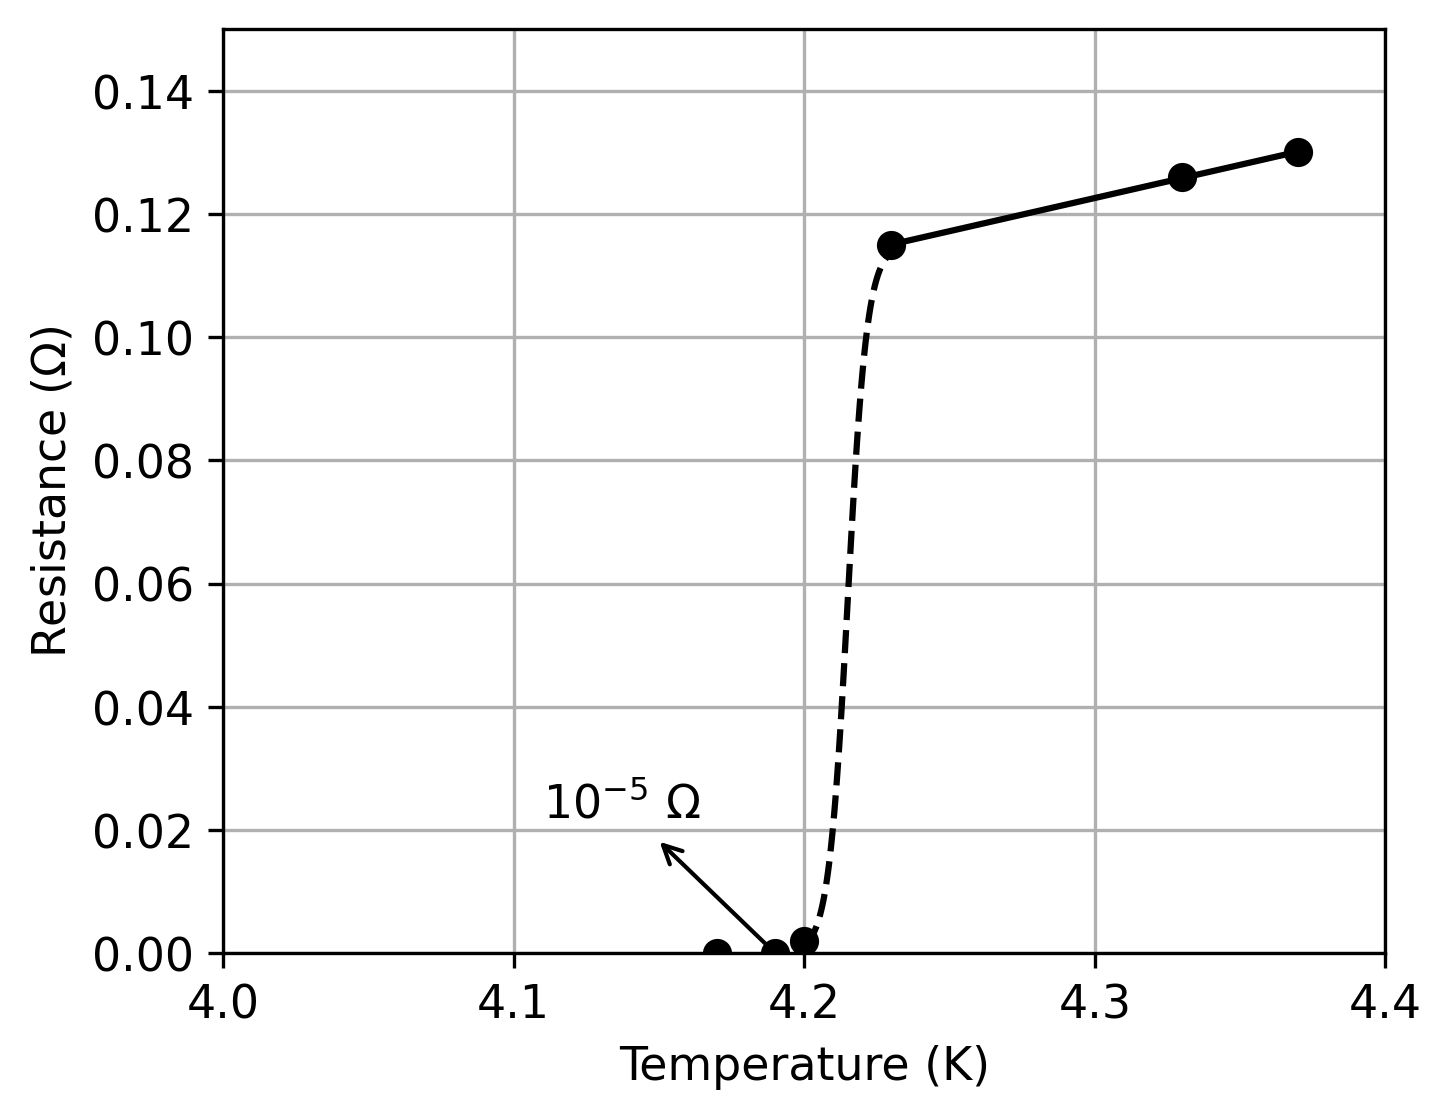

: 

In [ ]:
# cSpell: disable
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (5, 4)
plt.rcParams["font.size"] = 11
plt.rcParams["axes.labelsize"] = 11
plt.rcParams["axes.titlesize"] = 11
plt.rcParams["legend.fontsize"] = 10

# Set resolution for plots
plt.rcParams["figure.dpi"] = 300
plt.rcParams["savefig.dpi"] = 300

def plot_onnes_experiment(temperatures, resistances):
    """Plot the resistance vs temperature data from Onnes' experiment."""
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(temperatures, resistances, marker='o', linestyle='none', color='k')
    ax.set_xlabel('Temperature (K)')
    ax.set_ylabel('Resistance ($\\Omega$)')
    ax.grid(True)
    ax.set_xlim(4, 4.4)
    ax.set_ylim(0, 0.15)
    ax.annotate('$10^{-5} \\ \\Omega$', xy=(4.19, 1e-5), xytext=(4.11, 0.022),
                arrowprops=dict(facecolor='black', arrowstyle='<-'),)
    # Straight line between first 3 points
    x = np.array(temperatures[:3])
    y = np.array(resistances[:3])
    
    coeffs = np.polyfit(x, y, 1)
    poly = np.poly1d(coeffs)
    x_fit = np.linspace(4.23, 4.37, 100)
    y_fit = poly(x_fit)
    ax.plot(x_fit, y_fit, 'k-')
    
    # sigmoid curve between points 3 and 6
    def sigmoid(x, x0, k, L, b):
        return L / (1 + np.exp(-k * (x - x0))) + b
    x_sigmoid = np.linspace(4.2, 4.23, 100)
    y_sigmoid = sigmoid(x_sigmoid, x0=4.215, k=300, L=0.115, b=0)
    ax.plot(x_sigmoid, y_sigmoid, 'k--')
    
    
    plt.savefig('figs/figure_1.png', bbox_inches='tight')
    plt.show()
    
plot_onnes_experiment(
    temperatures=[4.37, 4.33, 4.23, 4.20, 4.19, 4.17],
    resistances=[0.13, 0.126, 0.115, 2e-3, 1e-5, 0]
)